#Import heart disease dataset using Pandas

In [1]:
import pandas as pd
import numpy as np
import dexplot as dxp

In [4]:
heart = pd.read_csv("D:\Desktop\heart.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,NaN,NaN,NaN,NaN
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,NaN,NaN,NaN,NaN
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,NaN,NaN,NaN,NaN
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,NaN,NaN,NaN,NaN
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,NaN,NaN,NaN,NaN
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,NaN,NaN,NaN,NaN
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,NaN,NaN,NaN,NaN
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,NaN,trestbps-thalach,NaN,-0.046698
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,NaN,trestbps-chol,chol,0.123174
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,NaN,NaN,NaN,NaN


#Clean the dataset by dropping unnecessery data values and columns

In [ ]:
heart.drop(["Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17"],axis=1,inplace = True)

In [9]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Plot relationship among labels in the dataset

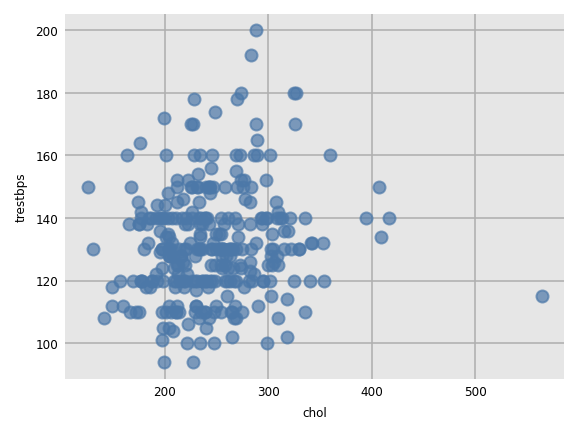

In [80]:
dxp.scatter(x ="chol",y ="trestbps",data = heart,)

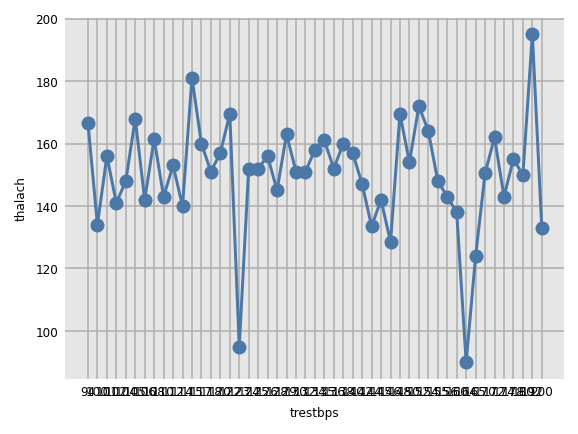

In [78]:
dxp.line(x='trestbps', y='thalach', data=heart, aggfunc='median')

#Describe your features( input data) and labels(output data) from among your dataset 

In [12]:
features = heart.drop(["target"],axis = 1)
labels = heart["target"]

#Import train_test_split module from Scikit-learn

In [14]:
from sklearn.model_selection import train_test_split

#Divide the dataset to be trained(60%),tested(20%) and validated(20%)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.4,random_state = 1)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size = 0.5,random_state = 1)

In [23]:
for dataset in (y_train,y_test,y_val):
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


#Random Forest Classifier and Cross-Validation 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 10-Fold Cross-Validation for Accuracy Range

In [68]:
rf = RandomForestClassifier()
score = cross_val_score(rf,X_train,y_train,cv = 10)
print("Accuracy Range in percentage:-")
for i in (score):
    print(round((i*100),2),"%")    

Accuracy Range in percentage:-
73.68 %
88.89 %
88.89 %
88.89 %
77.78 %
83.33 %
88.89 %
94.44 %
100.0 %
88.89 %


In [59]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Predict your test values

In [60]:
y_pred = rf.predict(X_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0]


#Accuracy of the model as per the dataset

In [67]:
print("Accuracy for above dataset: ",((rf.score(X_test,y_test))*100),"%")

Accuracy for above dataset:  73.77049180327869 %


#Classification report of the model

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        31
           1       0.74      0.77      0.75        30

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

